# 数据类型与数据组织
* 数据类型
  * 两个独立样本: 两个样本分别来自不同的总体, 数据间没有一一对应关系
  * 两个配对样本: 两组样本分别来自不同的总体, 但数据间有一一对应关系
* 数据组织
    * 宽数据: 每个样本保存为一列, 2个样本则对应2列(不能更改配对样本的行对应关系)
    * 长数据: 2个样本保存在同一列, 在另一列标明对应的样本类别(也叫因素、水平)，再在另一列标明**对应个体**(配对样本的必须信息)

In [ ]:
# 宽数据: 每个样本保存为一列, 2个样本则对应2列, 多个样本则对应多列
import pandas as pd
data = pd.read_excel('6 两个样本均值推断.xlsx', sheet_name='独立样本-宽数据')
data

In [ ]:
# 长数据: 2个样本保存在同一列, 再在新列标明对应的样本类别, 多个样本也只有2列
data2 = pd.read_excel('6 两个样本均值推断.xlsx', sheet_name='独立样本-长数据')
data2

In [ ]:
data2[data2.categories=='group1']  # 挑选出categories为group1的行

# 两个独立样本的t检验
* 两个独立样本t检验的目标
    * 用两个独立样本推断, 对应两个总体的均值$μ_{1}与μ_{2}$相等吗? $μ_{1}-μ_{2}=0$吗?
    * 例子: 男同学分数的均值, 等于女同学分数的均值吗?
* 两个独立样本t检验的条件
    * 独立随机样本 
        * 两个样本数据是随机、独立抽取的
    * 样本均值服从正态分布
        * 两个样本各自对应的总体服从正态分布, 或者, 两个样本为大样本(≥30)
        * 注意, 两个样本的容量可以不同: $n_1可以不等于n_2$

## student's t-test: 两总体同方差(方差齐) 时

### 基本原理
* ①计算两个样本的合并方差(假设两样本对应总体的方差相等)：
 $$合并方差s_{p}^{2} = \frac{S S_{1}+S S_{2}}{d f_{1}+d f_{2}}$$
* ②计算$M_{1}-M_{2}$的估计标准误：
$$M_{1}-M_{2} \text { 的估计标准误 }s_{\left(M_{1}-M_{2}\right)}=\sqrt{\frac{s_{p}^{2}}{n_{1}}+\frac{s_{p}^{2}}{n_{2}}}$$
* ③计算student' t 统计量：
$$student's\ \ t=\frac{\left(M_{1}-M_{2}\right)-\left(\mu_{1}-\mu_{2}\right)}{s_{\left(M_{1}-M_{2}\right)}}$$
* ④student's t 服从自由度为 $df_1+df_2=n_1+n_2-2$ 的t分布，做出推断

### 双尾检验

In [ ]:
# 两个样本对应的总体,是否有显著差异？
group1 = data['group1']
group2 = data['group2']
n1 = group1.count()   # 样本1的个数
n2 = group2.count()
M1 = group1.mean()    # 样本1的均值
M2 = group2.mean()
SS1 = ((group1-M1)**2).sum()   # 样本1的离差平方和
SS2 = ((group2-M2)**2).sum() 
df1 = n1-1   # 样本1的自由度
df2 = n2-1 
df = df1 + df2  # 样本的自由度
df

* 陈述假设
    * 原假设H0：μ1 - μ2 = 0 ， 两个总体的均值没有差异
    * 备择假设H1：μ1 - μ2 ≠ 0 ， 两个总体的均值有差异

* 设定判定标准
    * 设显著水平α=0.05、双尾，寻找临界值、临界区域（拒绝域）

In [ ]:
from scipy import stats
# 使用ppf函数返回分位数, 也即, 随机变量X小于该分位数的概率为p
X_left = stats.t.ppf(0.025,df=df)  # 左侧临界值，X小于该分位数的概率为0.025
X_right = stats.t.ppf(1-0.025,df=df)  # 右侧临界值，X小于该分位数的概率为1-0.025，X大于该分位数的概率为0.025
print('临界值为：%.3f 和 %.3f'%(X_left,X_right))
print('临界区域（拒绝域）为：X<%.3f 和 X>%.3f'%(X_left,X_right))

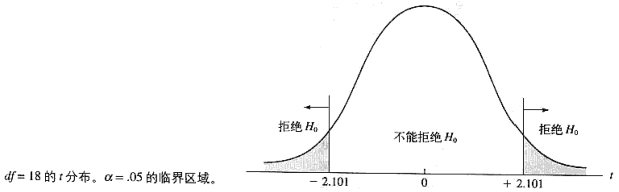

* 计算样本统计量

In [ ]:
# 若原假设成立, 两个样本的联合统计量M1-M2 服从t分布:
s_p_2 = (SS1+SS2)/(df1+df2)               # 两个样本的合并方差
s_M1_M2 = (s_p_2/n1 + s_p_2/n2) **0.5     # 估计标准误
t = ((M1-M2) - 0) / s_M1_M2               #  t分数
print('t分数为%.3f'% t)

* 做出推断

In [ ]:
print('t分数%.3f大于右侧临界值%.3f、处在临界区域（拒绝域）'% (t,X_right))
print('因而, 应拒绝原假设, 接受备择假设: 两个总体的均值不相等')

* 基于p值的推断

In [ ]:
# 基于t分数, 计算p值: 不需要根据显著水平α计算临界值和临界区域(拒绝域)
stats.t.cdf(-t,df=df) *2  # p值：比t分数更极端的概率（双尾）

* p值: 原假设正确时, t分数(随机变量)落在两端阴影部分的概率（t分数=±4）
* 因为，p值小于显著水平α=0.05，所以，拒绝原假设, 接受备择假设: 两个总体的均值不相等
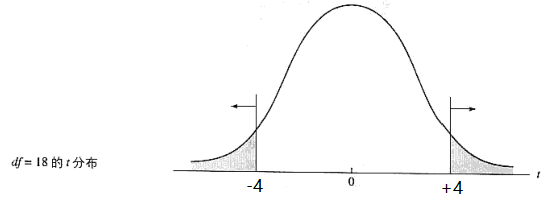

In [ ]:
# 使用scipy.stats包完成两个独立样本t检验, 原假设:  a.mean() - b.mean() = 0
from scipy import stats
stats.ttest_ind(a=group1,b=group2,equal_var=True)
# 默认为双尾检验
# equal_var=True 总体方差相等

In [ ]:
#使用statsmodels包完成两个独立样本t检验, 原假设:  x1.mean() - x2.mean() = 0
import statsmodels.api as sm
sm.stats.ttest_ind(x1=group1,x2=group2, alternative='two-sided', usevar='pooled', value=0)
# alternative='two-sided' 双边检验
# usevar='pooled' 总体方差相等
# value=0 假设x1.mean() - x2.mean() = 0

### 单尾检验
* t分数的计算, 单尾检验与双尾检验一致(绝对值)
* 给定相同显著水平α后, 单尾检验的临界值、临界区域(拒绝域), 不同于双尾检验
* 注意, 在单位检验中, 原假设$H_0$通常是希望否定的陈述, 备择假设$H_1$通常是希望肯定的陈述
* 例子
    * 样本1对应总体的均值, 大于样本2对应总体的均值吗？
    * 原假设H0：μ1 - μ2 ≤ 0 ， 样本1对应总体的均值, 小于等于样本2对应总体的均值
    * 备择假设H1：μ1 - μ2 > 0 ，样本1对应总体的均值, 大于样本2对应总体的均值
    * 设显著水平α=0.05、单尾，寻找临界值、临界区域（拒绝域）

In [ ]:
from scipy import stats
X_singal_tail = stats.t.ppf(1-0.05,df=df)  
# 右尾临界值，X小于该分位数的概率为1-0.05=0.95，X大于该分位数的概率为0.05
print('临界值为：%.3f'% X_singal_tail)
print('临界区域（拒绝域）为：X>%.3f,拒绝域在右尾(与备择假设一致)'% X_singal_tail)

In [ ]:
# 若原假设成立, 两个样本的联合统计量M1-M2 服从t分布:
print('t分数为%.3f, t分数大于临界值%.3f、处在临界区域（拒绝域）'% (t,X_singal_tail))
print('因而,应拒绝原假设,接受备择假设: 样本1对应总体的均值, 大于样本2对应总体的均值')

In [ ]:
# 基于t分数, 计算p值: 不需要根据显著水平α计算临界值和临界区域(拒绝域)
1- stats.t.cdf(t,df=df)  # p值：是越过统计量的右尾概率（拒绝域在右侧）
# p值小于显著水平α=0.05，拒绝原假设,接受备择假设

In [ ]:
# 使用scipy.stats包完成两个独立样本t检验, 原假设:  a.mean() - b.mean() ≤ 0
from scipy import stats
stats.ttest_ind(a=group1,b=group2,equal_var=True, alternative='greater')
# alternative='greater' 指定右尾检验，注意: 低版本scipy无法指定alternative参数

In [ ]:
#使用statsmodels包完成两个独立样本t检验, 原假设:  x1.mean() - x2.mean() ≤ 0
import statsmodels.api as sm
sm.stats.ttest_ind(x1=group1,x2=group2, alternative='larger', usevar='pooled')
# alternative='larger' 右尾检验(拒绝域在右尾)
# usevar='pooled' 总体方差相等

## 检验的效应大小
* 假设检验: 平均数的差异, 相对于统计量$M_{1}-M_{2}$的估计标准误, 是显著的吗?
* 效应大小: 平均数的差异, 相对于合并标准差, 是大的吗?

### 科恩d值
* 科恩d值: $d=\frac{平均数差}{标准差}=\frac{M_{1}-M_{2}}{\sqrt{s_{p}^{2}}}$
* 例子: $科恩d值=\frac{M_{1}-M_{2}}{\sqrt{s_{p}^{2}}}=\frac{26-18}{\sqrt{20}}=1.79$

In [ ]:
(M1-M2) / s_p_2**0.5   #科恩d值

### $r^2$
* $r^{2}=\frac{由处理解释的变异性}{总的变异性}=\frac{t^{2}}{t^{2}+df}$
* 例子:$\ r^{2}=\frac{4^{2}}{4^{2}+18}=0.47$

In [ ]:
t**2 / (t**2+df)   

## 对总体的同方差检验(方差齐性检验)
* 方差齐性检验的缘由：student's t-test（计算合并方差时）、方差分析，需要各样本对应总体的方差相等
* 方差齐性检验的原理：用各样本方差的差异，去推断各对应总体方差是否有差异
* 原假设: 各样本对应总体的方差相等
* 同方差检验的方法:
    * hartley检验
        * 用多组中最大的方差除最小的方差，得到一个F值，然后通过F值的判断来对方差齐性进行判断
        * 要求每组样本容量相等
    * Levene检验
        * 将每个值先转换为该值与其组内均值的离差，再基于离差做方差分析，即组间方差/组内方差
        * 不要求每组样本容量相等

In [ ]:
from scipy import stats
stats.levene(group1, group2, center='median')
# center='median' 缺省值, 基于中位数做同方差检验

* p值>0.05, 接受原假设： 各样本对应总体的方差相等

## Welch’s t-test :  两总体异方差(方差不齐)时
* 两总体异方差(方差不齐): 用Welch’s t-test替代student's t-test 

### 基本原理
* ①计算两个样本各自的方差：
 $$s_{1}^{2} = \frac{S S_{1}}{d f_{1}} \ \ \ \ \  s_{2}^{2} = \frac{S S_{2}}{d f_{2}}$$
* ②计算估计标准误：
$$M_{1}-M_{2} 的估计标准误s_{\left(M_{1}-M_{2}\right)}=\sqrt{\frac{s_{1}^{2}}{n_{1}}+\frac{s_{2}^{2}}{n_{2}}}$$
* ③计算Welch's t 统计量：
$$Welch's\ \ t=\frac{\left(M_{1}-M_{2}\right)-\left(\mu_{1}-\mu_{2}\right)}{s_{\left(M_{1}-M_{2}\right)}}$$
* ④Welch's t 服从自由度为df的标准t分布, df由如下修正公式计算:
$${\large df=\frac{\left(V_{1}+V_{2}\right)^{2}}{\frac{V_{1}^{2}}{n_{1}-1}+\frac{V_{2}^{2}}{n_{2}-1}} \ \ \ \ \     
其中:  V_{1}=\frac{s_{1}^{2}}{n_{1}} \ \ \ \ \  V_{2}=\frac{s_{2}^{2}}{n_{2}} } $$
* 考虑到Welch's t-test与student's t-test类似, **无论是否两总体方差齐, 有文献推荐直接使用Welch's t-test** https://kindsonthegenius.com/blog/welchs-t-test-how-and-when-to-use-it

### 双尾检验

In [ ]:
# 使用scipy.stats包完成两个独立样本t检验, 原假设: a.mean() - b.mean() = 0
from scipy import stats
stats.ttest_ind(a=group1,b=group2,equal_var=False)
# 默认双尾检验
# equal_var=False 总体方差不等

* p值小于显著水平α=0.05
* 拒绝原假设,接受备择假设: 两个总体的均值不相等

In [ ]:
#使用statsmodels包完成两个独立样本t检验: x1.mean() - x2.mean() = 0
import statsmodels.api as sm
sm.stats.ttest_ind(x1=group1,x2=group2, usevar='unequal', value=0)
# usevar='unequal' 总体方差不等
# value=0 假设x1.mean() - x2.mean() = 0

In [ ]:
#  使用pingouin进行统计分析, 原假设: x.mean() - y.mean() = 0
import pingouin as pg
pg.ttest(x=group1, y=group2, alternative='two-sided', correction=True)

### 单尾检验

In [ ]:
# 直接使用stats.ttest_ind()完成两个独立样本t检验, 原假设: a.mean() - b.mean() ≤ 0
from scipy import stats
stats.ttest_ind(a=group1,b=group2,equal_var=False, alternative='greater')
# alternative='greater' 指定右尾检验，alternative='less' 指定左尾检验， 注意: 低版本scipy无法指定alternative参数
# equal_var=False 总体方差不等

In [ ]:
#使用statsmodels包完成t检验, 原假设: x1.mean() - x2.mean() ≤ 0
import statsmodels.api as sm
sm.stats.ttest_ind(x1=group1,x2=group2, alternative='larger', usevar='unequal')
# # alternative='two-sided' 双边检验，alternative='larger' 右尾检验(拒绝域在右尾)，alternative='smaller' 左尾检验 
# usevar='unequal' 总体方差不等

# 两个配对样本的t检验

## 两个配对样本t检验的原理

* 两个配对样本t检验的目标
    * 从两个配对总体中产生两个配对样本, 推断对应两个总体的均值$μ_{1}与μ_{2}$相等吗? $μ_{1}-μ_{2}=0$吗?
    * 同一个体两条件下得分差值的总体均值为0吗? $μ_{X_2-X_1}=0$ 吗? 
    * 两个条件下的得分有系统性差异吗?
    * 条件变化时, 同一个体的得分发生变化吗?
* 例子
    * 对5位哮喘病人测量两次, 得到: 训练前所需药物剂量、训练后所需药物剂量, 每个样本的容量为5
    * 检验目标: 训练对哮喘病人所需药物剂量, 有影响吗?
    * 检验目标: 同一哮喘病人, 训练前所需药物剂量、训练后所需药物剂量, 相同吗?

In [ ]:
import pandas as pd
data3 = pd.read_excel('6 两个样本均值推断.xlsx', sheet_name='配对样本-宽数据')
data3

* 两个配对样本t检验的原理
    * 有两个配对总体
        * 两个总体是个体在两个条件下的得分,记为$X_1,X_2$
        * 个体的两个得分差值, 记为$D=X_2-X_1$
        * D的总体均值$μ_D=0$ 吗?        
    * 从两个配对总体中产生两个配对样本
        * 通常地, 对n个随机个体测量两次、得到两个配对样本    
        * 记两个配对样本为$x_1,x_2$, 每个样本含n个个体, 个体的两个得分差值, 记为$D=x_2-x_1$
        * D的样本均值记为$M_D$, 随着样本的变化(如抽取另外5位被试), D的样本均值$M_D$就发生变化(随机变量)
        * 样本均值$M_D$的均值等于$μ_D$
        * 样本均值$M_D$的标准差未知(总体D的标准差往往未知), 样本均值$M_D$的估计标准误$\large{s_{M_D}=\frac{s_D}{\sqrt{n}}}$
        * 若总体D服从正态分布(或n≥30), 统计量 $\large{t=\frac{M_D-μ_D}{s_{M_D}}}$服从自由度n-1的t分布
    * 因而, 可用单样本t检验来推断: D的总体均值$μ_D$是否为0

## 两个配对样本t检验的例子
* 问题: 训练对哮喘病人所需药物剂量, 有影响吗?

* 陈述假设
    * 原假设$H_0:μ_{D}=0$, 经过训练后, 哮喘病人所需药物剂量未发生变化
    * 备择假设$H_1:μ_{D}≠0$, 经过训练后, 哮喘病人所需药物剂量已发生变化

* 设定判定标准
    * 原假设为真, 意味着D的样本均值$M_D$服从自由度df=5-1=4的t分布

In [ ]:
# 假定显著水平α=0.05后,计算临界值与临界区域
n = 5  # 样本的容量
df = n-1    # 样本的自由度
from scipy import stats
t_left = stats.t.ppf(0.025,df=df)  # 左侧临界值，t小于该分位数的概率为0.025
t_right = stats.t.ppf(1-0.025,df=df)  # 右侧临界值，t小于该分位数的概率为1-0.025，t大于该分位数的概率为0.025
print('临界值为：%.3f 和 %.3f'%(t_left,t_right))
print('临界区域（拒绝域）为：t<%.3f 和 t>%.3f'%(t_left,t_right))

* 计算样本统计量

In [ ]:
D = data3['差值D']          # 配对样本的差值
M_D = D.mean()              # D的样本均值
SS = ((D - M_D)**2).sum()   # D的离差平方和
s_D_2 = SS/df               # D的样本方差
s_D = s_D_2 ** 0.5          # D的样本标准差
s_M_D = s_D / n**0.5        # 样本均值M_D的估计标准误
t =  (M_D - 0) / s_M_D      # 样本均值M_D的t统计量
print('t值为:%.3f'%t)

* 做出推断
    * t值(统计量)超出临界值、处在临界区域(拒绝域) ，拒绝原假设，接受备择假设：
    * 经过训练后, 哮喘病人所需药物剂量已发生变化

* 基于p值的推断

In [ ]:
from scipy import stats
pvalue = stats.t.cdf(x=t,df=df) *2  # t值对应的p值(双尾), 左尾概率*2
print('p值为:%.3f'% pvalue)
print('p值小于0.05,拒绝原假设，接受备择假设')

## python应用: 两个配对样本t检验

In [ ]:
x1 = data3['训练前所需药物剂量']   # 样本1
x2 = data3['训练后所需药物剂量']   # 样本2

In [ ]:
# 使用stats.ttest_rel()完成两个配对样本t检验, 原假设: (a - b).mean()= 0
from scipy import stats
stats.ttest_rel(a=x2, b=x1)
# 默认双尾检验

In [ ]:
x2-x1

In [ ]:
# 使用stats.ttest_1samp()完成t检验, 原假设: (a - b).mean() - popmean= 0
from scipy import stats
stats.ttest_1samp(a=x2-x1,popmean=0)  # 单样本均值t检验，(x2-x1).mean()是否为0  

In [ ]:
# 使用statsmodels包完成两个配对样本t检验, 原假设: (x2-x1).mean() = 0
import statsmodels.api as sm
sm.stats.DescrStatsW(x2-x1).ttest_mean(value=0)

In [ ]:
#  使用pingouin进行统计分析, 原假设: (x - y).mean()= 0
import pingouin as pg
pg.ttest(x=x2, y=x1, paired=True, alternative='two-sided')